# Table of Contents
## Import Libraries
## Import Data 
## 2 Correlation Matrix
## 3 Scatterplot 
## 4 Pair Plots
## 5 Categorical Plots 
## 6 Export Data 

# Import Libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Import Data 

In [4]:
# Create a path 
path = r'/Users/alejandrosalgado/Desktop/Final Project'

In [5]:
df = pd.read_csv(r'/Users/alejandrosalgado/Desktop/Final Project/02 Data /Prepared Data/Boat_Orders_clean.csv', index_col = False)

In [6]:
# Checking Data frame 
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,City,USD_price
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,BÃ¶nningstedt,3699.40
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,Bayern,3602.94
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,Switzerland,Seengen,3780.00
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,Italy,Lake Garda,3710.00
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,Switzerland,Zugersee,4968.00


In [7]:
df.shape

(6001, 12)

In [8]:
df.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Number of views last 7 days', 'Country',
       'City', 'USD_price'],
      dtype='object')

In [9]:
# Droping columns that are not needed 
df = df.drop(['Unnamed: 0'],axis = 1)

In [10]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'Country', 'City',
       'USD_price'],
      dtype='object')

In [11]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,City,USD_price
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,BÃ¶nningstedt,3699.40
1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,Bayern,3602.94
2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,Switzerland,Seengen,3780.00
3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,Italy,Lake Garda,3710.00
4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,Switzerland,Zugersee,4968.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    6001 non-null   object 
 1   Manufacturer                 6001 non-null   object 
 2   Type                         6001 non-null   object 
 3   Year Built                   6001 non-null   int64  
 4   Length                       6001 non-null   float64
 5   Width                        6001 non-null   float64
 6   Material                     6001 non-null   object 
 7   Number of views last 7 days  6001 non-null   int64  
 8   Country                      6001 non-null   object 
 9   City                         6001 non-null   object 
 10  USD_price                    6001 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 515.8+ KB


# 2 Correlation Matrix

In [13]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'Country', 'City',
       'USD_price'],
      dtype='object')

In [14]:
# Some variables not needed, creating subset
sub = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'USD_price']]

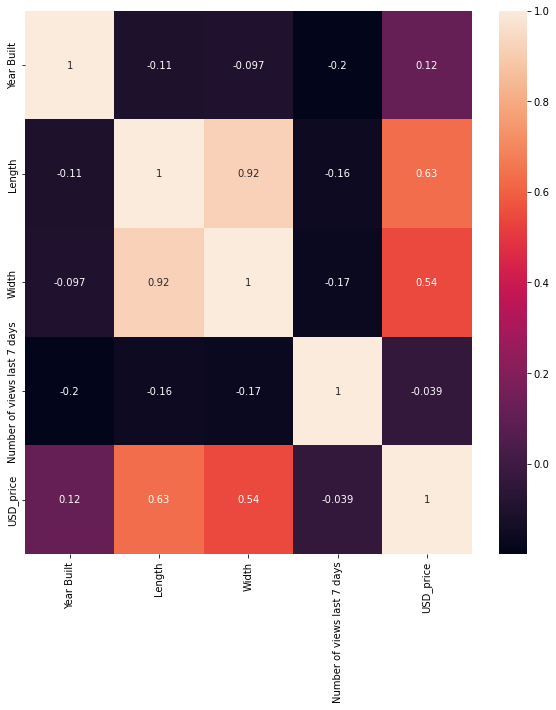

In [15]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

There are not many strong correlations besides length and width. That makese sense as boats that are long and wide generally are proportional. I see that the USD_price has a correlation of .54 for width and .63 for length. It could mean that the longer the boat is the more expensive. I also see that there is weak correlation to the number of views for the last 7 days section and that could be due to a varietyt of factors. 

# 3 Scatterplot

I would like to do a deeper dive on the USD_price and Number of views in the last 7 days to see any patterns.

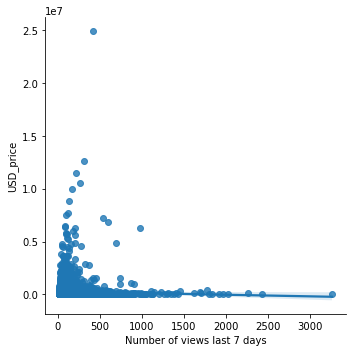

In [16]:
# Scatterplot for the "Number of views last 7 days" and the "USD_price"
sns.lmplot(x='Number of views last 7 days', y ='USD_price', data = df)

I see a small downward trend, but it looks like the most views are concentrated in boats costing under $500,000. There is even one that was viewed 3000 times. It looks like the biggest concentration is around the $300,000 range and there is one outlier that is about $2,500,000. This outlier can be because people wanted to see what a $2,500,000 boat looks like. 

Checking to see if the newer boats are more popular.

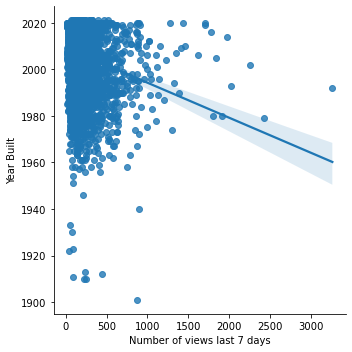

In [17]:
# Scatterplot for the "Number of views last 7 days" and the "Year Built"
sns.lmplot(x='Number of views last 7 days', y ='Year Built', data = df)

There is a downward trend with older boats having more views, but that can be because of price and other factors.

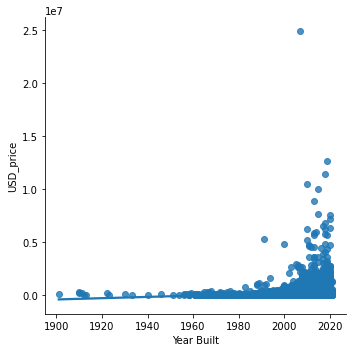

In [18]:
# Scatterplot for the "Year Built" and the "USD_price"
sns.lmplot(x='Year Built', y ='USD_price', data = df)

It looks like there
is a strong concentration on boats that are cheaper 
in price compared to the others. 
The more expensive ones seem to be more modern. Prices can depend on boat conditions.

# 4 Pair Plots 

In [19]:
sub.columns

Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'USD_price'],
      dtype='object')

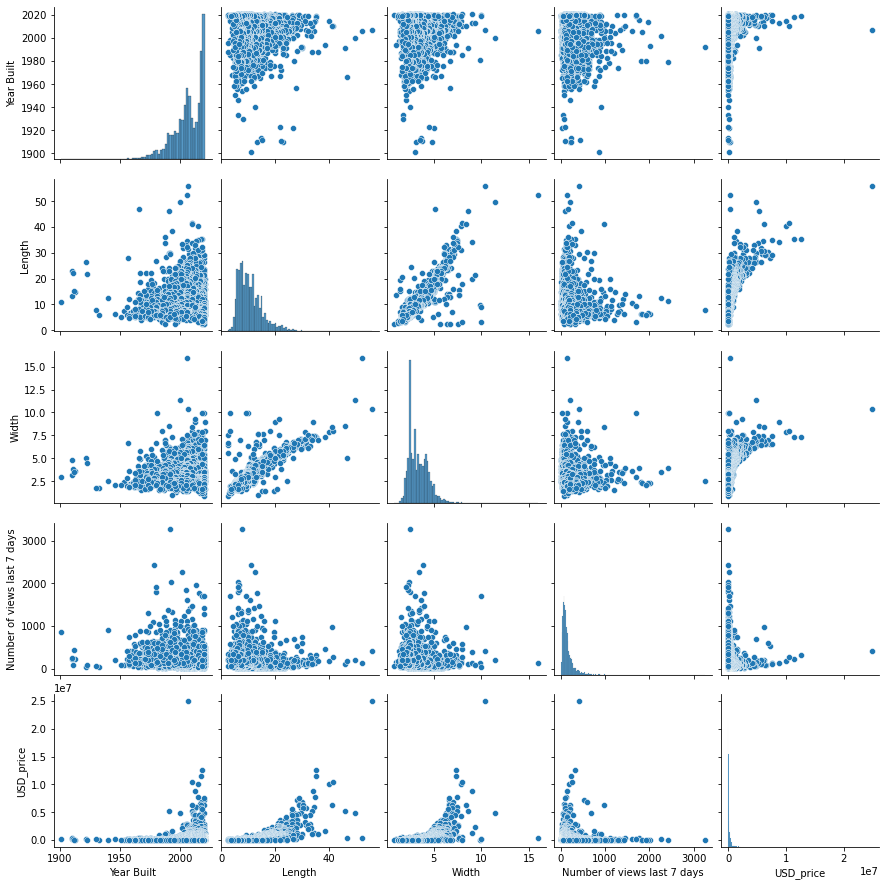

In [20]:
g = sns.pairplot(sub)

There is a positive correlation between listing price and width and listing price and length.

# 5 Categorical Plots 

<AxesSubplot:xlabel='USD_price', ylabel='Count'>

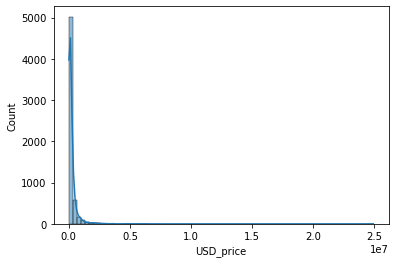

In [21]:
# Creating a histogram of listing prices to visualize the distribution
sns.histplot(df['USD_price'],bins=75,kde=True)

In [22]:
# creating listing price categories
df.loc[df['USD_price'] <50000, 'Pricing Category'] = 'Low-priced'
df.loc[df['USD_price'] >100000, 'Pricing Category'] = 'High-Priced'
df.loc[(df['USD_price'] >=50000) & (df['USD_price'] <=100000), 'Pricing Category'] = 'Mid-Priced'

In [23]:
df['Pricing Category'].value_counts(dropna=False)

High-Priced    2859
Low-priced     1691
Mid-Priced     1451
Name: Pricing Category, dtype: int64

In [24]:
df.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
Country                         object
City                            object
USD_price                      float64
Pricing Category                object
dtype: object

In [25]:
# Reduce RAM usage
df['Number of views last 7 days'] = df['Number of views last 7 days'].astype('int32')

In [26]:
df.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int32
Country                         object
City                            object
USD_price                      float64
Pricing Category                object
dtype: object

# 6 Export Data 

In [28]:
# Export data to pkl
df.to_pickle(os.path.join(path,'Boat_Orders_clean.pkl'))